In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from math import sqrt

In [7]:
X_raw , y_raw = fetch_openml('mnist_784', version=1, return_X_y=True)

In [41]:
print(X_raw.shape)
print(y_raw.shape)


(70000, 784)
(70000,)
42000


In [9]:
#Dataframes converted into numpy arrays
X_raw_np = X_raw.to_numpy()
y_raw_np = y_raw.to_numpy()

Exploring the data:

In [10]:
#Thought it'd be cool to see the images as a matrix

np.set_printoptions(linewidth=2000)
print(X_raw_np[0].reshape(28, 28))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253. 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.]

Label is 5


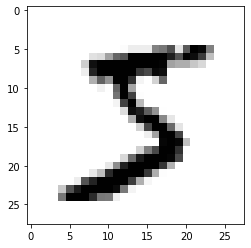

In [11]:
index=0

plt.imshow(X_raw_np[index].reshape(28,28), cmap=cm.binary)
print("Label is", y_raw_np[index])

End of exploration.

In [112]:
#Data split into 60% training, 20% validation & 20% test

X_train, X_temp, y_train, y_temp = train_test_split(X_raw_np, y_raw_np, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [113]:
#Checking dimensions

print("X_train =",X_train.shape)
print("y_train =",y_train.shape)
print("X_val =", X_val.shape)
print("y_val =", y_val.shape)
print("X_test =", X_test.shape)
print("y_test =", y_test.shape)

X_train = (42000, 784)
y_train = (42000,)
X_val = (14000, 784)
y_val = (14000,)
X_test = (14000, 784)
y_test = (14000,)


In [114]:
#changing values to between 0-1 
X_train, X_val, X_test = np.array(X_train/255), np.array(X_val/255), np.array(X_test/255)


# Changing y data into binary matricies such that each row is a vector with 0s and 1 which indicates the label.
# this is done so that a MSE error can be calulated while using sigmoid activation function for the output layer.


#y_train into binary matrix
y_train_binary = np.zeros((len(y_train),10))

j = 0
for i in range(0, len(y_train)):
    


    if int(y_train[i]) == 0:
        
        y_train_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 1:
        
        y_train_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 2:
        
        y_train_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_train[i]) == 3:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 4:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 5:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_train[i]) == 6:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 7:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 8:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_train[i]) == 9:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1
    


        
#y_val into binary matrix
y_val_binary = np.zeros((len(y_val),10))

j = 0
for i in range(0, len(y_val)):
    


    if int(y_val[i]) == 0:
        
        y_val_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 1:
        
        y_val_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 2:
        
        y_val_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_val[i]) == 3:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 4:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 5:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_val[i]) == 6:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 7:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 8:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_val[i]) == 9:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1



#y_test into binary matrix
y_test_binary = np.zeros((len(y_test),10))

j = 0
for i in range(0, len(y_test)):
    


    if int(y_test[i]) == 0:
        
        y_test_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 1:
        
        y_test_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 2:
        
        y_test_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_test[i]) == 3:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 4:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 5:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_test[i]) == 6:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 7:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 8:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_test[i]) == 9:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1



#### **NN begins**

##### In this implementation everything is manually coded.

##### NN specification:

L = 4, L1 has 784 neurons, 2 hidden layers have 16 neurons each and the output layer has 10, one for each digit.


W2 has dimensions 16 x 784 <br>
W3 has dimensions 16 x 16 <br>
W4 has dimensions 10 x 16 <br>

b2-3 has dimensions 16 x 1 <br>
b4 has dimensions 10 x 1 <br>


##### Procedure:
1. Manually generate all weight matricies and biases then initalize randomly 

***

2. Split data into mini batches
3. Feedforward a single training example from a given batch
4. Calulate cost 
5. Backprop and calulate the gradient

***

6. Repeat steps 3-5 for all images in first batch

***

7. Average the gradient of the cost for all images in the first batch
8. apply gradient decent step to update the weights

***

9. Repeat 3-8 for all minibatches

***
10. shuffle data
11. Repeat 2-9 for a given number of 'epochs' 



In [115]:
#Creating and initializing matricies & biases randomly to values between -5 - 5

#W2 = np.random.uniform(low = -5,high= 5,size =(16, 784))
#W3 = np.random.uniform(low = -5,high= 5,size =(16, 16))
#W4 = np.random.uniform(low = -5,high= 5,size =(10, 16))

#b2 = np.random.uniform(low = -5,high= 5,size =(16, 1))
#b3 = np.random.uniform(low = -5,high= 5,size =(16, 1))
#b4 = np.random.uniform(low = -5,high= 5,size =(10, 1))




In [116]:
# Function for shuffling and creating mini batches by turning X and y into tensors
from sklearn.utils import shuffle


def create_mini_batch(X_input, y_input, mini_batch_size):

    X_shuffled, y_shuffled = shuffle(X_input, y_input)

    reshaped_dim = int(len(X_shuffled)/mini_batch_size)

    X_minibatches_tensor = X_shuffled.reshape(reshaped_dim, mini_batch_size,  X_shuffled.shape[1] )

    y_minibatches_tensor = y_shuffled.reshape(reshaped_dim, mini_batch_size,  y_shuffled.shape[1])


    return X_minibatches_tensor, y_minibatches_tensor


# The above function outputs a X tensor such that each matrix being a mini batch with each row being an image
# it outputs y a 3 tendor with the input being the y binary matricies. the matricies of the tensor are a given minibatch
#  and the rows are the labels of each image. 


In [117]:
# Activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Derivative of sigmoid 
def sigmoid_prime(z):
    return sigmoid(z)*(1.0-sigmoid(z))

In [118]:
# Feedsforward one layer and outputs Z and activations of the next layer. 
def feedforward(a, W, b):
    Z_l = np.dot(W, a) + b
    A_l = sigmoid(Z_l)

    return Z_l, A_l 

#input data X needs to be fed in column vec form .reshape(784, 1)

In [119]:
#Old MSE cost function
"""
def Cost_per_example(a_L, Y):
    e2 = ((a_L - Y)**2)/2
    cost = e2.sum()
    return cost
"""

# cross entropy

def Cost_per_example(a, y):
    return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))


In [120]:
#Backpropagation

def backprop(X, Y, W2, W3, W4, B2, B3, B4, batch_no, example_no):

    
    Z_2, a_2 = feedforward(X[batch_no][example_no].reshape(784,1), W2, B2)
    Z_3, a_3 = feedforward(a_2, W3, B3)
    Z_L, a_L = feedforward(a_3, W4, B4)
    
    #old MSE function below 
    #delta_L = np.multiply(((a_L - Y[batch_no][example_no].reshape(10,1))**2), sigmoid_prime(Z_L))

    delta_L = a_L - Y[batch_no][example_no].reshape(10,1)
    delta_3 = np.multiply(np.dot(W4.T, delta_L), sigmoid_prime(Z_3))
    delta_2 = np.multiply(np.dot(W3.T, delta_3), sigmoid_prime(Z_2))

    #creating derivatives of cost w.r.t weight matricies

    d_W4 = np.zeros((10, 16))
    for j in range(10):
        for k in range(16):
            d_W4[j][k] += delta_L[j]*a_3[k]

    d_W3 = np.zeros((16, 16))
    for j in range(16):
        for k in range(16):
            d_W3[j][k] += delta_3[j]*a_2[k]


    d_W2 = np.zeros((16, 784))
    for j in range(16):
        for k in range(784):
            d_W2[j][k] += delta_2[j]*X[batch_no][example_no].reshape(784,1)[k]


    d_b4, d_b3, d_b2 = delta_L, delta_3, delta_2


    return d_W2, d_W3, d_W4, d_b2, d_b3, d_b4

In [121]:
#Function that updates the weights using gradient decent 

def update_weights(X, Y, W2, W3, W4, B2, B3, B4, batch_no, batch_size, learning_rate):

    d_W2_av = np.zeros(W2.shape)
    d_W3_av = np.zeros(W3.shape)
    d_W4_av = np.zeros(W4.shape)

    d_b2_av = np.zeros(B2.shape)
    d_b3_av = np.zeros(B3.shape)
    d_b4_av = np.zeros(B4.shape)


    for example_no in range(batch_size):
        d_W2_t, d_W3_t, d_W4_t, d_b2_t, d_b3_t, d_b4_t = backprop(X, Y, W2, W3, W4, B2, B3, B4, batch_no, example_no)

        d_W2_av += d_W2_t
        d_W3_av += d_W3_t
        d_W4_av += d_W4_t

        d_b2_av += d_b2_t
        d_b3_av += d_b3_t
        d_b4_av += d_b4_t

    d_W2_av = d_W2_av/batch_size
    d_W3_av = d_W3_av/batch_size
    d_W4_av = d_W4_av/batch_size

    d_b2_av = d_b2_av/batch_size
    d_b3_av = d_b3_av/batch_size
    d_b4_av = d_b4_av/batch_size


    W2_updated = W2 - (learning_rate*d_W2_av)
    W3_updated = W3 - (learning_rate*d_W3_av)
    W4_updated = W4 - (learning_rate*d_W4_av)

    b2_updated = B2 - (learning_rate*d_b2_av)
    b3_updated = B3 - (learning_rate*d_b3_av)
    b4_updated = B4 - (learning_rate*d_b4_av) 

    return W2_updated, W3_updated, W4_updated, b2_updated, b3_updated, b4_updated 


In [122]:
#run network for n epoches and output error 

def run(X_in, Y_in, epochs, learning_rate, mini_batch_size):


    lowerw2, upperw2 = -(1.0 / sqrt(784)), (1.0 / sqrt(784 ))
    lowerw3, upperw3 = -(1.0 / sqrt(16)), (1.0 / sqrt(16))
    lowerw4, upperw4 = -(1.0 / sqrt(16)), (1.0 / sqrt(16))

    lowerb2, upperb2 = -5, 5
    lowerb3, upperb3 = -5, 5
    lowerb4, upperb4 = -5, 5

    W2 = np.random.uniform(low = lowerw2, high= upperw2, size =(16, 784))
    W3 = np.random.uniform(low = lowerw3, high= upperw3, size =(16, 16))
    W4 = np.random.uniform(low = lowerw4, high= upperw4, size =(10, 16))

    b2 = np.random.uniform(low = lowerb2, high= upperb2, size =(16, 1))
    b3 = np.random.uniform(low = lowerb3, high= upperb3, size =(16, 1))
    b4 = np.random.uniform(low = lowerb4, high= upperb4, size =(10, 1))

    cost_array = []

    for ep in range(epochs):

        #shuffle data & generate mini batches

        X, Y = create_mini_batch(X_in, Y_in, mini_batch_size)
        cost_1 = 0
        correct = 0
        

        for batch_n in range(int(len(X_in)/mini_batch_size)):

            #gradient decent step here

            W2, W3, W4, b2, b3, b4 = update_weights(X, Y, W2, W3, W4, b2, b3, b4, batch_n, mini_batch_size, learning_rate)

            for example_num in range(mini_batch_size):

                Z_2, a_2 = feedforward(X[batch_n][example_num].reshape(784,1), W2, b2)
                Z_3, a_3 = feedforward(a_2, W3, b3)
                Z_L, a_L = feedforward(a_3, W4, b4)


                cost_1 += Cost_per_example(a_L, Y[batch_n][example_num].reshape(10,1))/mini_batch_size
                
                if np.argmax(a_L) == np.argmax(Y[batch_n][example_num].reshape(10,1)):
                    correct += 1
                
                
                    
        print("Epoch",ep,"Cost:", cost_1, "Training accuracy:", correct,"/", X_in.shape[0])
        cost_array.append(cost_1)

    

    return  W2, W3, W4, b2, b3, b4, cost_array



In [123]:
def test(X, Y, W2, W3, W4, b2, b3, b4):

    correct = 0

    for example_num in range(X.shape[0]):

        Z_2, a_2 = feedforward(X[example_num].reshape(784,1), W2, b2)
        Z_3, a_3 = feedforward(a_2, W3, b3)
        Z_L, a_L = feedforward(a_3, W4, b4)


        if np.argmax(a_L) == np.argmax(Y[example_num].reshape(10, 1)):
            correct += 1


    print("Correct =", correct, "/", X.shape[0])
    print("Percentage correct = ", (correct/X.shape[0])*100)

    

#### Experimentation:

Changed data to 20% of total images as it takes a long time to run

In [89]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 5, 0.1, 100)

Epoch 0 Cost: 503.88024955229645
Epoch 0 Percentage:  1655 / 14000
Epoch 1 Cost: 453.5050486492571
Epoch 1 Percentage:  1876 / 14000
Epoch 2 Cost: 452.8786148412077
Epoch 2 Percentage:  1803 / 14000
Epoch 3 Cost: 451.6686007222868
Epoch 3 Percentage:  2150 / 14000
Epoch 4 Cost: 448.9456373762324
Epoch 4 Percentage:  2816 / 14000


In [91]:
test(X_test, y_test_binary, W2_new, W3_new, W4_new, b2_new, b3_new, b4_new)

Correct = 5537 / 28000
Percentage correct =  19.775000000000002


In [92]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 3, 0.025, 10)

Epoch 0 Cost: 4720.711717038095
Epoch 0 Percentage:  1777 / 14000
Epoch 1 Cost: 4517.228737730253
Epoch 1 Percentage:  2109 / 14000
Epoch 2 Cost: 4421.716182927301
Epoch 2 Percentage:  3027 / 14000


In [93]:
test(X_test, y_test_binary, W2_new, W3_new, W4_new, b2_new, b3_new, b4_new)

Correct = 5712 / 28000
Percentage correct =  20.4


In [95]:
print("trial 1")
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 3, 0.5, 100)

print("trial 2")
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 3, 0.05, 10)


trial 1
Epoch 0 Cost: 452.88483969459867
Epoch 0 Percentage:  1983 / 14000
Epoch 1 Cost: 441.31987922810634
Epoch 1 Percentage:  3040 / 14000
Epoch 2 Cost: 389.5685888851722
Epoch 2 Percentage:  4917 / 14000
trial 2
Epoch 0 Cost: 4611.47227926237
Epoch 0 Percentage:  2211 / 14000
Epoch 1 Cost: 4311.171218715453
Epoch 1 Percentage:  3522 / 14000
Epoch 2 Cost: 3739.2495496289994
Epoch 2 Percentage:  5528 / 14000


In [96]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 3, 0.1, 10)

Epoch 0 Cost: 4373.008069090727
Epoch 0 Percentage:  3166 / 14000
Epoch 1 Cost: 3395.3363525502655
Epoch 1 Percentage:  6540 / 14000
Epoch 2 Cost: 2397.9124951390627
Epoch 2 Percentage:  10030 / 14000


In [97]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 3, 0.5, 10)

Epoch 0 Cost: 2243.2538174374567
Epoch 0 Percentage:  9881 / 14000
Epoch 1 Cost: 615.6892567512273
Epoch 1 Percentage:  13389 / 14000
Epoch 2 Cost: 468.10752825988936
Epoch 2 Percentage:  13483 / 14000


In [98]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 3, 1, 10)

Epoch 0 Cost: 1672.209003266521
Epoch 0 Percentage:  10993 / 14000
Epoch 1 Cost: 559.5427448488434
Epoch 1 Percentage:  13299 / 14000
Epoch 2 Cost: 518.8300304747571
Epoch 2 Percentage:  13341 / 14000


In [99]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 3, 0.7, 10)

Epoch 0 Cost: 1731.3536069608533
Epoch 0 Percentage:  11028 / 14000
Epoch 1 Cost: 537.8881597949859
Epoch 1 Percentage:  13384 / 14000
Epoch 2 Cost: 453.8452969425871
Epoch 2 Percentage:  13431 / 14000


In [104]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 20, 0.5, 10)

Epoch 0 Cost: 2383.031146482604 Training accuracy: 9706 / 14000
Epoch 1 Cost: 714.5884623342408 Training accuracy: 13233 / 14000
Epoch 2 Cost: 457.5925506768615 Training accuracy: 13494 / 14000
Epoch 3 Cost: 382.22987707300445 Training accuracy: 13565 / 14000
Epoch 4 Cost: 349.19272392455787 Training accuracy: 13586 / 14000
Epoch 5 Cost: 305.97340351460286 Training accuracy: 13650 / 14000
Epoch 6 Cost: 283.1739477780453 Training accuracy: 13666 / 14000
Epoch 7 Cost: 262.95575367285255 Training accuracy: 13704 / 14000
Epoch 8 Cost: 249.69478781508093 Training accuracy: 13689 / 14000
Epoch 9 Cost: 249.03153563042142 Training accuracy: 13698 / 14000
Epoch 10 Cost: 229.55738821133286 Training accuracy: 13735 / 14000
Epoch 11 Cost: 235.75709858294672 Training accuracy: 13722 / 14000
Epoch 12 Cost: 221.03842128214188 Training accuracy: 13735 / 14000
Epoch 13 Cost: 213.63347947344593 Training accuracy: 13739 / 14000
Epoch 14 Cost: 201.63699070013848 Training accuracy: 13755 / 14000
Epoch 15 C

In [105]:
test(X_test, y_test_binary, W2_new, W3_new, W4_new, b2_new, b3_new, b4_new)

Correct = 25834 / 28000
Percentage correct =  92.2642857142857


##### 92.25% accurary on test data when trained on 20% of the training data

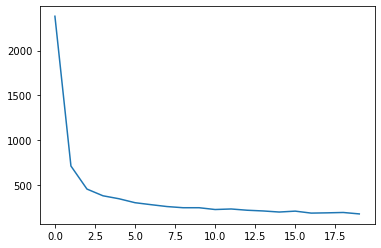

In [111]:
X = range(20)
Y = [2383,714,457,382,349,305,283,262,249,249,229,235,221,213,201,211,189,192,196,180]

plt.plot(X, Y)

#### Final run

data changed back to 60% training and 20% test, validation data is not used. 

In [124]:
W2_final, W3_final, W4_final, b2_final, b3_final, b4_final, cost_array = run(X_train, y_train_binary, 20, 0.5, 10)

Epoch 0 Cost: 4483.274540216967 Training accuracy: 34044 / 42000
Epoch 1 Cost: 1407.7264416146181 Training accuracy: 40245 / 42000
Epoch 2 Cost: 1139.355725718285 Training accuracy: 40564 / 42000
Epoch 3 Cost: 1054.9949076909088 Training accuracy: 40660 / 42000
Epoch 4 Cost: 1022.8664167105374 Training accuracy: 40690 / 42000
Epoch 5 Cost: 975.1325211540442 Training accuracy: 40730 / 42000
Epoch 6 Cost: 969.0300308873937 Training accuracy: 40732 / 42000
Epoch 7 Cost: 957.0281317214826 Training accuracy: 40750 / 42000
Epoch 8 Cost: 904.8357765204346 Training accuracy: 40817 / 42000
Epoch 9 Cost: 890.7010350037003 Training accuracy: 40842 / 42000
Epoch 10 Cost: 882.4316347305729 Training accuracy: 40861 / 42000
Epoch 11 Cost: 867.6745629863731 Training accuracy: 40874 / 42000
Epoch 12 Cost: 865.7280199976391 Training accuracy: 40866 / 42000
Epoch 13 Cost: 864.0917845608375 Training accuracy: 40845 / 42000
Epoch 14 Cost: 839.7070442537831 Training accuracy: 40903 / 42000
Epoch 15 Cost: 81

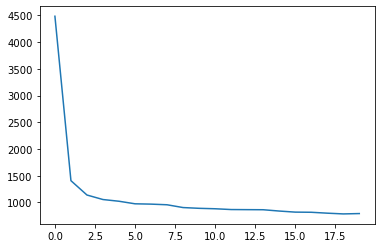

In [125]:
X = range(20)
Y = cost_array
plt.plot(X,Y)

In [126]:
test(X_test, y_test_binary, W2_final, W3_final, W4_final, b2_final, b3_final, b4_final)

Correct = 13122 / 14000
Percentage correct =  93.72857142857143
